# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

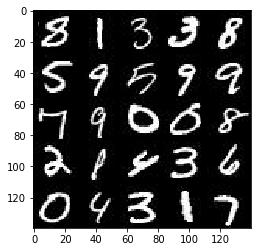

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

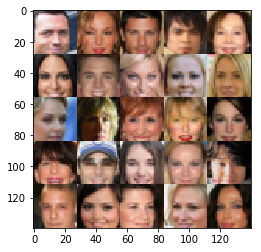

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    drop_rate = .2 
    with tf.variable_scope('discriminator', reuse = reuse ):
        x1 = tf.layers.dropout(images, rate=drop_rate)
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x1 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        X1 = tf.layers.dropout(x1, rate=drop_rate)
        x1 = tf.maximum(alpha * x1, x1)
        
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        #x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.layers.dropout(x3, rate=drop_rate)
        x3 = tf.maximum(alpha * x3, x3)
       
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6349... Generator Loss: 2.0082
Epoch 1/2... Discriminator Loss: 0.6980... Generator Loss: 4.8685
Epoch 1/2... Discriminator Loss: 1.6630... Generator Loss: 4.3730
Epoch 1/2... Discriminator Loss: 0.6440... Generator Loss: 1.7330
Epoch 1/2... Discriminator Loss: 0.7655... Generator Loss: 1.5026
Epoch 1/2... Discriminator Loss: 0.6193... Generator Loss: 2.2780
Epoch 1/2... Discriminator Loss: 0.7141... Generator Loss: 2.1263
Epoch 1/2... Discriminator Loss: 0.6533... Generator Loss: 1.8397
Epoch 1/2... Discriminator Loss: 0.8575... Generator Loss: 1.2839
Epoch 1/2... Discriminator Loss: 0.9638... Generator Loss: 1.0429


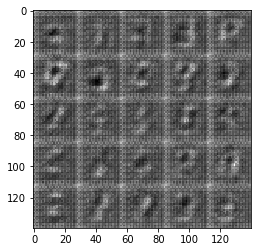

Epoch 1/2... Discriminator Loss: 0.8057... Generator Loss: 1.4991
Epoch 1/2... Discriminator Loss: 0.7017... Generator Loss: 1.7036
Epoch 1/2... Discriminator Loss: 1.2542... Generator Loss: 3.3807
Epoch 1/2... Discriminator Loss: 0.9630... Generator Loss: 1.0016
Epoch 1/2... Discriminator Loss: 1.0515... Generator Loss: 3.3141
Epoch 1/2... Discriminator Loss: 0.8195... Generator Loss: 2.2135
Epoch 1/2... Discriminator Loss: 0.7365... Generator Loss: 1.9526
Epoch 1/2... Discriminator Loss: 0.7278... Generator Loss: 1.3932
Epoch 1/2... Discriminator Loss: 0.6370... Generator Loss: 1.9193
Epoch 1/2... Discriminator Loss: 0.8045... Generator Loss: 1.2152


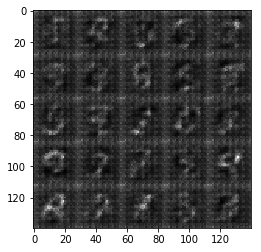

Epoch 1/2... Discriminator Loss: 0.6836... Generator Loss: 1.4155
Epoch 1/2... Discriminator Loss: 0.6497... Generator Loss: 2.0639
Epoch 1/2... Discriminator Loss: 0.7246... Generator Loss: 1.2880
Epoch 1/2... Discriminator Loss: 0.6279... Generator Loss: 1.6752
Epoch 1/2... Discriminator Loss: 0.9975... Generator Loss: 0.9548
Epoch 1/2... Discriminator Loss: 0.8718... Generator Loss: 3.1648
Epoch 1/2... Discriminator Loss: 0.8693... Generator Loss: 1.0479
Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 2.4095
Epoch 1/2... Discriminator Loss: 0.8286... Generator Loss: 1.1077
Epoch 1/2... Discriminator Loss: 1.8691... Generator Loss: 4.4212


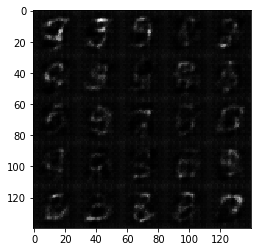

Epoch 1/2... Discriminator Loss: 0.7114... Generator Loss: 2.2360
Epoch 1/2... Discriminator Loss: 0.6053... Generator Loss: 1.6648
Epoch 1/2... Discriminator Loss: 0.6058... Generator Loss: 1.9728
Epoch 1/2... Discriminator Loss: 0.6026... Generator Loss: 1.7483
Epoch 1/2... Discriminator Loss: 0.5698... Generator Loss: 2.1827
Epoch 1/2... Discriminator Loss: 1.5429... Generator Loss: 0.4914
Epoch 1/2... Discriminator Loss: 0.6529... Generator Loss: 2.7583
Epoch 1/2... Discriminator Loss: 0.5924... Generator Loss: 1.9996
Epoch 1/2... Discriminator Loss: 0.5874... Generator Loss: 2.0216
Epoch 1/2... Discriminator Loss: 0.7054... Generator Loss: 1.3468


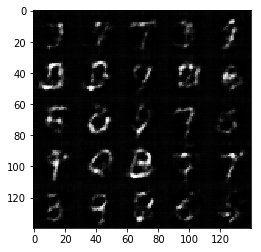

Epoch 1/2... Discriminator Loss: 0.7293... Generator Loss: 1.2692
Epoch 1/2... Discriminator Loss: 0.6076... Generator Loss: 1.7753
Epoch 1/2... Discriminator Loss: 0.6190... Generator Loss: 2.2353
Epoch 1/2... Discriminator Loss: 0.6403... Generator Loss: 2.7401
Epoch 1/2... Discriminator Loss: 0.7862... Generator Loss: 1.4381
Epoch 1/2... Discriminator Loss: 0.9997... Generator Loss: 0.8396
Epoch 1/2... Discriminator Loss: 0.7068... Generator Loss: 1.3202
Epoch 1/2... Discriminator Loss: 0.6205... Generator Loss: 1.7231
Epoch 1/2... Discriminator Loss: 0.6314... Generator Loss: 2.0712
Epoch 1/2... Discriminator Loss: 0.9772... Generator Loss: 0.9806


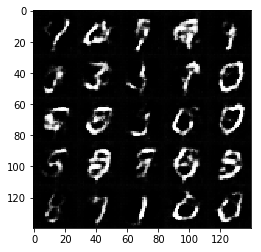

Epoch 1/2... Discriminator Loss: 0.6214... Generator Loss: 1.7481
Epoch 1/2... Discriminator Loss: 1.7096... Generator Loss: 3.8146
Epoch 1/2... Discriminator Loss: 0.9663... Generator Loss: 0.9174
Epoch 1/2... Discriminator Loss: 0.7000... Generator Loss: 1.7926
Epoch 1/2... Discriminator Loss: 0.6905... Generator Loss: 2.0561
Epoch 1/2... Discriminator Loss: 0.6541... Generator Loss: 1.5214
Epoch 1/2... Discriminator Loss: 0.6540... Generator Loss: 1.7250
Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 2.4935
Epoch 1/2... Discriminator Loss: 0.6836... Generator Loss: 1.9213
Epoch 1/2... Discriminator Loss: 0.6721... Generator Loss: 1.7768


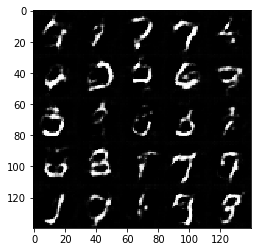

Epoch 1/2... Discriminator Loss: 1.0818... Generator Loss: 0.7351
Epoch 1/2... Discriminator Loss: 0.8546... Generator Loss: 1.0422
Epoch 1/2... Discriminator Loss: 0.7694... Generator Loss: 1.2107
Epoch 1/2... Discriminator Loss: 2.4566... Generator Loss: 4.6652
Epoch 1/2... Discriminator Loss: 0.8184... Generator Loss: 1.4803
Epoch 1/2... Discriminator Loss: 1.1547... Generator Loss: 0.7433
Epoch 1/2... Discriminator Loss: 0.6926... Generator Loss: 1.5530
Epoch 1/2... Discriminator Loss: 0.5972... Generator Loss: 1.8514
Epoch 1/2... Discriminator Loss: 0.8959... Generator Loss: 1.0679
Epoch 1/2... Discriminator Loss: 0.8379... Generator Loss: 1.0946


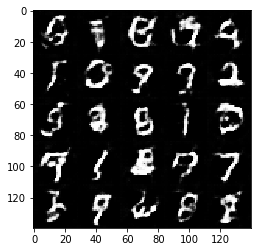

Epoch 1/2... Discriminator Loss: 0.6547... Generator Loss: 1.7588
Epoch 1/2... Discriminator Loss: 0.5796... Generator Loss: 1.7173
Epoch 1/2... Discriminator Loss: 0.8646... Generator Loss: 1.1752
Epoch 1/2... Discriminator Loss: 1.2372... Generator Loss: 0.6718
Epoch 1/2... Discriminator Loss: 0.6652... Generator Loss: 1.6208
Epoch 1/2... Discriminator Loss: 0.7285... Generator Loss: 1.5202
Epoch 1/2... Discriminator Loss: 0.6283... Generator Loss: 1.7860
Epoch 1/2... Discriminator Loss: 1.5775... Generator Loss: 2.6345
Epoch 1/2... Discriminator Loss: 1.2757... Generator Loss: 2.2036
Epoch 1/2... Discriminator Loss: 0.9689... Generator Loss: 1.1530


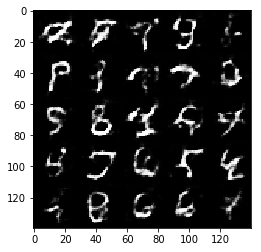

Epoch 1/2... Discriminator Loss: 0.8691... Generator Loss: 2.0827
Epoch 1/2... Discriminator Loss: 1.0577... Generator Loss: 0.8244
Epoch 1/2... Discriminator Loss: 0.8190... Generator Loss: 1.1055
Epoch 1/2... Discriminator Loss: 0.7243... Generator Loss: 1.8224
Epoch 1/2... Discriminator Loss: 1.3404... Generator Loss: 0.5830
Epoch 1/2... Discriminator Loss: 0.8447... Generator Loss: 1.5591
Epoch 1/2... Discriminator Loss: 0.7446... Generator Loss: 1.3153
Epoch 1/2... Discriminator Loss: 0.6704... Generator Loss: 1.6041
Epoch 1/2... Discriminator Loss: 0.7533... Generator Loss: 1.2154
Epoch 1/2... Discriminator Loss: 0.7817... Generator Loss: 1.1314


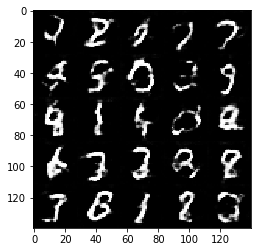

Epoch 1/2... Discriminator Loss: 1.4648... Generator Loss: 0.5855
Epoch 1/2... Discriminator Loss: 0.9491... Generator Loss: 0.9917
Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 0.5766
Epoch 2/2... Discriminator Loss: 1.2849... Generator Loss: 0.5552
Epoch 2/2... Discriminator Loss: 0.8338... Generator Loss: 1.7927
Epoch 2/2... Discriminator Loss: 0.6956... Generator Loss: 1.3338
Epoch 2/2... Discriminator Loss: 0.8653... Generator Loss: 2.2372
Epoch 2/2... Discriminator Loss: 0.7084... Generator Loss: 1.4220
Epoch 2/2... Discriminator Loss: 0.9479... Generator Loss: 0.8720
Epoch 2/2... Discriminator Loss: 0.6661... Generator Loss: 1.4585


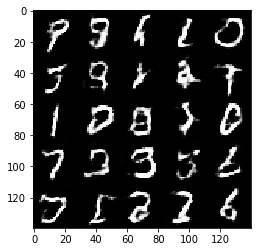

Epoch 2/2... Discriminator Loss: 0.6280... Generator Loss: 1.6570
Epoch 2/2... Discriminator Loss: 0.7412... Generator Loss: 1.2639
Epoch 2/2... Discriminator Loss: 0.6350... Generator Loss: 1.4917
Epoch 2/2... Discriminator Loss: 1.1275... Generator Loss: 0.6926
Epoch 2/2... Discriminator Loss: 0.7279... Generator Loss: 1.2793
Epoch 2/2... Discriminator Loss: 0.8385... Generator Loss: 1.3455
Epoch 2/2... Discriminator Loss: 1.0185... Generator Loss: 1.9320
Epoch 2/2... Discriminator Loss: 1.4411... Generator Loss: 3.1469
Epoch 2/2... Discriminator Loss: 0.9297... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 0.7166... Generator Loss: 1.6570


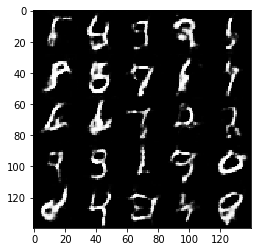

Epoch 2/2... Discriminator Loss: 0.7644... Generator Loss: 1.2215
Epoch 2/2... Discriminator Loss: 1.0049... Generator Loss: 3.0935
Epoch 2/2... Discriminator Loss: 0.8257... Generator Loss: 1.2416
Epoch 2/2... Discriminator Loss: 0.7076... Generator Loss: 1.7413
Epoch 2/2... Discriminator Loss: 0.6052... Generator Loss: 1.7622
Epoch 2/2... Discriminator Loss: 0.5963... Generator Loss: 1.8221
Epoch 2/2... Discriminator Loss: 0.7389... Generator Loss: 2.7429
Epoch 2/2... Discriminator Loss: 0.8274... Generator Loss: 1.1195
Epoch 2/2... Discriminator Loss: 0.6787... Generator Loss: 2.1534
Epoch 2/2... Discriminator Loss: 0.6554... Generator Loss: 1.6369


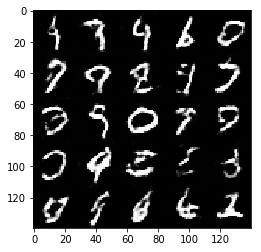

Epoch 2/2... Discriminator Loss: 0.6603... Generator Loss: 1.5451
Epoch 2/2... Discriminator Loss: 1.5765... Generator Loss: 0.6113
Epoch 2/2... Discriminator Loss: 0.8307... Generator Loss: 2.0702
Epoch 2/2... Discriminator Loss: 0.8324... Generator Loss: 1.5631
Epoch 2/2... Discriminator Loss: 1.0217... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.2493... Generator Loss: 3.0677
Epoch 2/2... Discriminator Loss: 0.8325... Generator Loss: 1.2188
Epoch 2/2... Discriminator Loss: 0.7808... Generator Loss: 1.4698
Epoch 2/2... Discriminator Loss: 0.6662... Generator Loss: 1.8894
Epoch 2/2... Discriminator Loss: 0.8030... Generator Loss: 1.2756


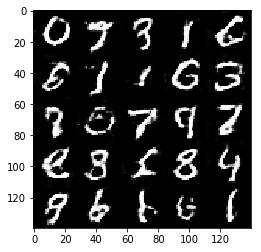

Epoch 2/2... Discriminator Loss: 0.7328... Generator Loss: 1.2735
Epoch 2/2... Discriminator Loss: 0.5551... Generator Loss: 1.9161
Epoch 2/2... Discriminator Loss: 0.8696... Generator Loss: 1.3063
Epoch 2/2... Discriminator Loss: 0.8902... Generator Loss: 1.5604
Epoch 2/2... Discriminator Loss: 1.3029... Generator Loss: 0.6029
Epoch 2/2... Discriminator Loss: 0.8249... Generator Loss: 1.1903
Epoch 2/2... Discriminator Loss: 0.7120... Generator Loss: 1.3698
Epoch 2/2... Discriminator Loss: 0.7440... Generator Loss: 1.5017
Epoch 2/2... Discriminator Loss: 1.3625... Generator Loss: 0.5801
Epoch 2/2... Discriminator Loss: 0.8645... Generator Loss: 1.0082


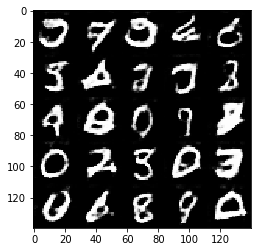

Epoch 2/2... Discriminator Loss: 0.6070... Generator Loss: 1.9182
Epoch 2/2... Discriminator Loss: 1.0725... Generator Loss: 0.7619
Epoch 2/2... Discriminator Loss: 1.4078... Generator Loss: 3.3939
Epoch 2/2... Discriminator Loss: 1.0718... Generator Loss: 0.8412
Epoch 2/2... Discriminator Loss: 1.1223... Generator Loss: 0.7197
Epoch 2/2... Discriminator Loss: 0.5969... Generator Loss: 1.9798
Epoch 2/2... Discriminator Loss: 0.6704... Generator Loss: 1.9639
Epoch 2/2... Discriminator Loss: 0.9142... Generator Loss: 1.0940
Epoch 2/2... Discriminator Loss: 0.8627... Generator Loss: 1.9304
Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 0.9461


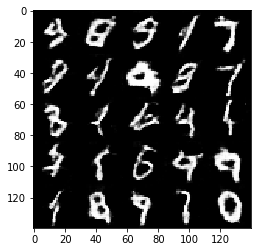

Epoch 2/2... Discriminator Loss: 1.1542... Generator Loss: 2.5941
Epoch 2/2... Discriminator Loss: 0.9493... Generator Loss: 0.9269
Epoch 2/2... Discriminator Loss: 0.8599... Generator Loss: 1.0608
Epoch 2/2... Discriminator Loss: 0.6522... Generator Loss: 1.5346
Epoch 2/2... Discriminator Loss: 0.7791... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 0.8205... Generator Loss: 1.5766
Epoch 2/2... Discriminator Loss: 0.6922... Generator Loss: 1.6613
Epoch 2/2... Discriminator Loss: 0.7713... Generator Loss: 1.9055
Epoch 2/2... Discriminator Loss: 0.7146... Generator Loss: 1.8983
Epoch 2/2... Discriminator Loss: 0.8098... Generator Loss: 1.1485


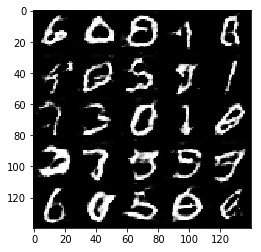

Epoch 2/2... Discriminator Loss: 0.7815... Generator Loss: 1.2963
Epoch 2/2... Discriminator Loss: 1.1926... Generator Loss: 0.6927
Epoch 2/2... Discriminator Loss: 0.7896... Generator Loss: 1.1543
Epoch 2/2... Discriminator Loss: 1.0969... Generator Loss: 0.7686
Epoch 2/2... Discriminator Loss: 0.6945... Generator Loss: 1.5800
Epoch 2/2... Discriminator Loss: 1.9623... Generator Loss: 0.3376
Epoch 2/2... Discriminator Loss: 0.7381... Generator Loss: 1.3419
Epoch 2/2... Discriminator Loss: 0.7898... Generator Loss: 1.2429
Epoch 2/2... Discriminator Loss: 0.7331... Generator Loss: 1.3678
Epoch 2/2... Discriminator Loss: 0.9277... Generator Loss: 0.9650


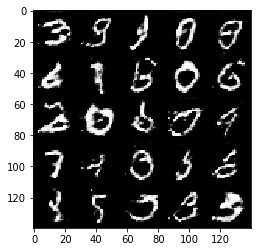

Epoch 2/2... Discriminator Loss: 0.7252... Generator Loss: 1.9910
Epoch 2/2... Discriminator Loss: 0.9793... Generator Loss: 0.8826
Epoch 2/2... Discriminator Loss: 1.0174... Generator Loss: 1.3567
Epoch 2/2... Discriminator Loss: 1.0401... Generator Loss: 0.8794
Epoch 2/2... Discriminator Loss: 0.9957... Generator Loss: 2.1669
Epoch 2/2... Discriminator Loss: 0.9139... Generator Loss: 1.2775
Epoch 2/2... Discriminator Loss: 0.8674... Generator Loss: 1.3608
Epoch 2/2... Discriminator Loss: 0.6852... Generator Loss: 1.5785
Epoch 2/2... Discriminator Loss: 0.8149... Generator Loss: 1.2744
Epoch 2/2... Discriminator Loss: 0.8808... Generator Loss: 1.0899


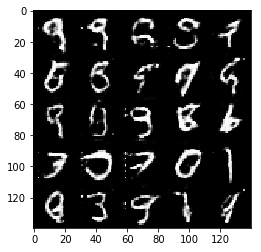

Epoch 2/2... Discriminator Loss: 0.8342... Generator Loss: 1.3287
Epoch 2/2... Discriminator Loss: 1.5104... Generator Loss: 3.9341
Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.4584
Epoch 2/2... Discriminator Loss: 1.3246... Generator Loss: 0.6323
Epoch 2/2... Discriminator Loss: 0.8176... Generator Loss: 2.1404
Epoch 2/2... Discriminator Loss: 1.1929... Generator Loss: 0.6995
Epoch 2/2... Discriminator Loss: 0.6590... Generator Loss: 1.5122


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9108... Generator Loss: 1.1652
Epoch 1/1... Discriminator Loss: 0.5962... Generator Loss: 2.4664
Epoch 1/1... Discriminator Loss: 0.5610... Generator Loss: 2.0130
Epoch 1/1... Discriminator Loss: 0.4272... Generator Loss: 3.3366
Epoch 1/1... Discriminator Loss: 0.6777... Generator Loss: 12.9551
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 3.7846
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 1.1869
Epoch 1/1... Discriminator Loss: 1.2000... Generator Loss: 2.4269
Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 1.2991
Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 1.5247


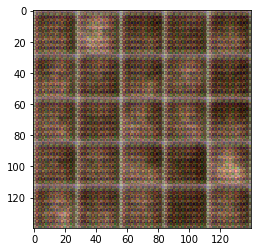

Epoch 1/1... Discriminator Loss: 0.7932... Generator Loss: 2.6942
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 1.0249
Epoch 1/1... Discriminator Loss: 0.6664... Generator Loss: 3.4508
Epoch 1/1... Discriminator Loss: 0.6539... Generator Loss: 1.9738
Epoch 1/1... Discriminator Loss: 0.5947... Generator Loss: 2.8472
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 0.8753
Epoch 1/1... Discriminator Loss: 0.6616... Generator Loss: 3.0509
Epoch 1/1... Discriminator Loss: 0.7656... Generator Loss: 1.7481
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.9814
Epoch 1/1... Discriminator Loss: 0.6821... Generator Loss: 2.6104


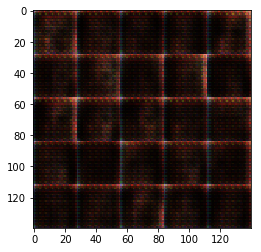

Epoch 1/1... Discriminator Loss: 0.8325... Generator Loss: 1.4683
Epoch 1/1... Discriminator Loss: 0.6216... Generator Loss: 2.2337
Epoch 1/1... Discriminator Loss: 0.8871... Generator Loss: 3.6312
Epoch 1/1... Discriminator Loss: 0.7655... Generator Loss: 1.4179
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 3.1667
Epoch 1/1... Discriminator Loss: 0.8533... Generator Loss: 1.8009
Epoch 1/1... Discriminator Loss: 1.7259... Generator Loss: 4.9539
Epoch 1/1... Discriminator Loss: 0.9305... Generator Loss: 2.4479
Epoch 1/1... Discriminator Loss: 0.8510... Generator Loss: 1.3589
Epoch 1/1... Discriminator Loss: 0.8347... Generator Loss: 1.7160


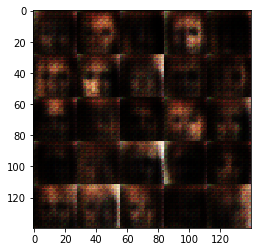

Epoch 1/1... Discriminator Loss: 0.7840... Generator Loss: 2.1583
Epoch 1/1... Discriminator Loss: 0.6743... Generator Loss: 3.1179
Epoch 1/1... Discriminator Loss: 0.7909... Generator Loss: 1.4685
Epoch 1/1... Discriminator Loss: 0.7532... Generator Loss: 1.6584
Epoch 1/1... Discriminator Loss: 0.9349... Generator Loss: 2.4796
Epoch 1/1... Discriminator Loss: 0.9315... Generator Loss: 1.7669
Epoch 1/1... Discriminator Loss: 1.1117... Generator Loss: 2.6228
Epoch 1/1... Discriminator Loss: 0.8422... Generator Loss: 1.3934
Epoch 1/1... Discriminator Loss: 0.9374... Generator Loss: 1.6820
Epoch 1/1... Discriminator Loss: 0.9933... Generator Loss: 1.0516


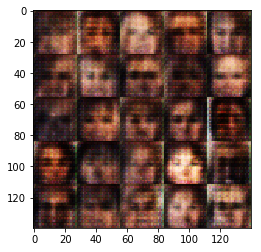

Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.5759
Epoch 1/1... Discriminator Loss: 0.9831... Generator Loss: 1.1516
Epoch 1/1... Discriminator Loss: 0.9217... Generator Loss: 1.2106
Epoch 1/1... Discriminator Loss: 1.6997... Generator Loss: 3.9039
Epoch 1/1... Discriminator Loss: 1.6976... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.4021... Generator Loss: 0.7393
Epoch 1/1... Discriminator Loss: 0.9657... Generator Loss: 1.1226
Epoch 1/1... Discriminator Loss: 0.9803... Generator Loss: 0.9599
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.5657
Epoch 1/1... Discriminator Loss: 0.7817... Generator Loss: 1.6301


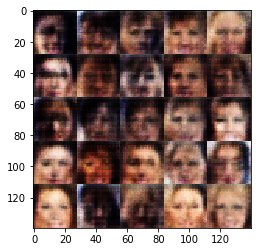

Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.7557
Epoch 1/1... Discriminator Loss: 0.9932... Generator Loss: 1.1301
Epoch 1/1... Discriminator Loss: 0.9229... Generator Loss: 1.6689
Epoch 1/1... Discriminator Loss: 1.0382... Generator Loss: 0.9922
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 2.0650
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.2883
Epoch 1/1... Discriminator Loss: 1.4812... Generator Loss: 0.4778
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 1.1969
Epoch 1/1... Discriminator Loss: 1.1008... Generator Loss: 1.2521
Epoch 1/1... Discriminator Loss: 1.2423... Generator Loss: 0.6805


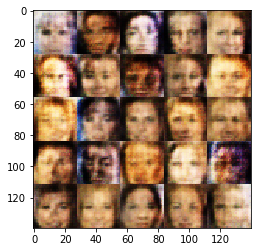

Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 1.7944
Epoch 1/1... Discriminator Loss: 0.8832... Generator Loss: 1.3156
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 0.8548
Epoch 1/1... Discriminator Loss: 0.9790... Generator Loss: 1.1086
Epoch 1/1... Discriminator Loss: 1.1288... Generator Loss: 1.2948
Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 2.2109
Epoch 1/1... Discriminator Loss: 1.0423... Generator Loss: 1.0841
Epoch 1/1... Discriminator Loss: 1.1030... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.0410... Generator Loss: 1.6131


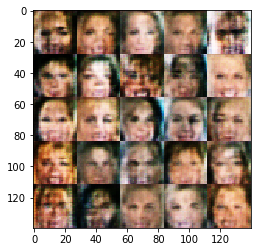

Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.5097
Epoch 1/1... Discriminator Loss: 1.1463... Generator Loss: 0.8342
Epoch 1/1... Discriminator Loss: 1.5240... Generator Loss: 2.3664
Epoch 1/1... Discriminator Loss: 1.1769... Generator Loss: 0.9887
Epoch 1/1... Discriminator Loss: 1.1468... Generator Loss: 1.4193
Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 1.3042
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 0.8608
Epoch 1/1... Discriminator Loss: 0.9353... Generator Loss: 1.5898
Epoch 1/1... Discriminator Loss: 1.2698... Generator Loss: 1.9132


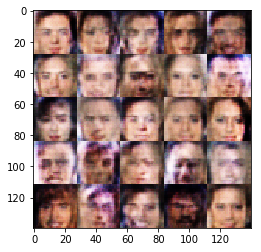

Epoch 1/1... Discriminator Loss: 1.1146... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 1.2225... Generator Loss: 1.4671
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.5937
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.0841... Generator Loss: 0.9751
Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 1.0657
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.6385
Epoch 1/1... Discriminator Loss: 1.0732... Generator Loss: 0.9162
Epoch 1/1... Discriminator Loss: 0.9436... Generator Loss: 1.4059
Epoch 1/1... Discriminator Loss: 1.1090... Generator Loss: 1.6074


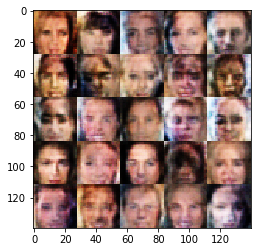

Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 1.0616
Epoch 1/1... Discriminator Loss: 0.9254... Generator Loss: 1.9122
Epoch 1/1... Discriminator Loss: 1.3473... Generator Loss: 2.0651
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.5948
Epoch 1/1... Discriminator Loss: 1.1872... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.0681... Generator Loss: 1.0695
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 1.7507
Epoch 1/1... Discriminator Loss: 1.0078... Generator Loss: 0.9961
Epoch 1/1... Discriminator Loss: 1.0604... Generator Loss: 1.9017
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 1.1602


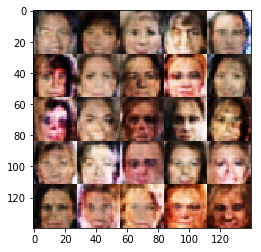

Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 1.1188... Generator Loss: 0.8534
Epoch 1/1... Discriminator Loss: 1.0317... Generator Loss: 1.1896
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 1.7533
Epoch 1/1... Discriminator Loss: 1.1777... Generator Loss: 2.0439
Epoch 1/1... Discriminator Loss: 1.5923... Generator Loss: 1.7960
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.0060
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 1.3583
Epoch 1/1... Discriminator Loss: 1.0798... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.6475


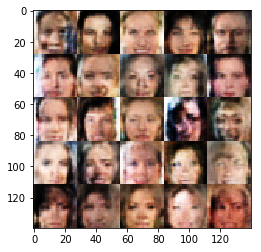

Epoch 1/1... Discriminator Loss: 1.7295... Generator Loss: 0.3390
Epoch 1/1... Discriminator Loss: 1.5120... Generator Loss: 2.6981
Epoch 1/1... Discriminator Loss: 1.1437... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 0.8606... Generator Loss: 1.3474
Epoch 1/1... Discriminator Loss: 0.8893... Generator Loss: 1.8656
Epoch 1/1... Discriminator Loss: 1.4364... Generator Loss: 0.4830
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.1768
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.1868
Epoch 1/1... Discriminator Loss: 0.9972... Generator Loss: 0.9198


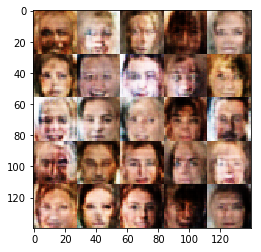

Epoch 1/1... Discriminator Loss: 0.9890... Generator Loss: 0.9529
Epoch 1/1... Discriminator Loss: 1.7519... Generator Loss: 2.9240
Epoch 1/1... Discriminator Loss: 0.9335... Generator Loss: 1.1703
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 0.8545... Generator Loss: 1.4558
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 1.0154
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.0215
Epoch 1/1... Discriminator Loss: 0.9613... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 0.9386
Epoch 1/1... Discriminator Loss: 0.8357... Generator Loss: 1.3885


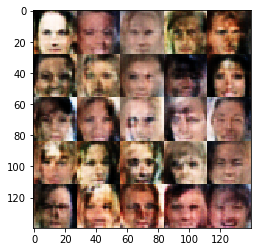

Epoch 1/1... Discriminator Loss: 0.9415... Generator Loss: 1.2948
Epoch 1/1... Discriminator Loss: 1.0447... Generator Loss: 1.0115
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.0292
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 1.5164
Epoch 1/1... Discriminator Loss: 0.8550... Generator Loss: 1.8064
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.4969
Epoch 1/1... Discriminator Loss: 1.0331... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 1.3457
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.4539... Generator Loss: 0.5088


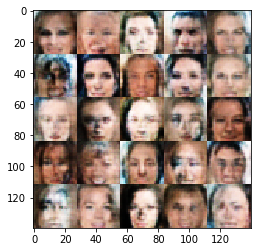

Epoch 1/1... Discriminator Loss: 1.1188... Generator Loss: 0.7501
Epoch 1/1... Discriminator Loss: 1.5532... Generator Loss: 0.4172
Epoch 1/1... Discriminator Loss: 0.8733... Generator Loss: 1.4358
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 1.7195
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 1.9545
Epoch 1/1... Discriminator Loss: 0.9280... Generator Loss: 1.0800
Epoch 1/1... Discriminator Loss: 1.0268... Generator Loss: 0.8638
Epoch 1/1... Discriminator Loss: 0.9309... Generator Loss: 1.3448
Epoch 1/1... Discriminator Loss: 0.8361... Generator Loss: 1.2502
Epoch 1/1... Discriminator Loss: 0.7207... Generator Loss: 2.2459


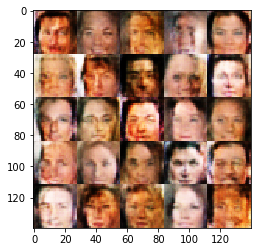

Epoch 1/1... Discriminator Loss: 1.8333... Generator Loss: 0.3239
Epoch 1/1... Discriminator Loss: 1.0645... Generator Loss: 1.0340
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.5476
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.6242
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 1.5477
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 0.9268
Epoch 1/1... Discriminator Loss: 1.4110... Generator Loss: 0.5226
Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 0.9464... Generator Loss: 1.8844
Epoch 1/1... Discriminator Loss: 0.9292... Generator Loss: 0.9823


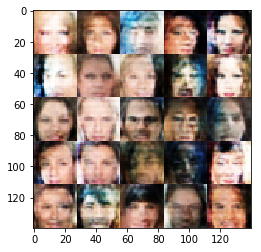

Epoch 1/1... Discriminator Loss: 1.5262... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 1.2188
Epoch 1/1... Discriminator Loss: 0.8923... Generator Loss: 1.3185
Epoch 1/1... Discriminator Loss: 1.0715... Generator Loss: 0.9184
Epoch 1/1... Discriminator Loss: 0.9263... Generator Loss: 1.6102
Epoch 1/1... Discriminator Loss: 0.7845... Generator Loss: 1.7355
Epoch 1/1... Discriminator Loss: 1.0247... Generator Loss: 0.8900
Epoch 1/1... Discriminator Loss: 1.1551... Generator Loss: 1.3633
Epoch 1/1... Discriminator Loss: 0.9523... Generator Loss: 1.0606
Epoch 1/1... Discriminator Loss: 1.0953... Generator Loss: 0.8894


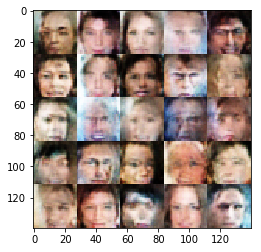

Epoch 1/1... Discriminator Loss: 1.0112... Generator Loss: 0.9473
Epoch 1/1... Discriminator Loss: 0.8882... Generator Loss: 1.1588
Epoch 1/1... Discriminator Loss: 0.8877... Generator Loss: 1.2201
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 0.9502... Generator Loss: 1.0413
Epoch 1/1... Discriminator Loss: 1.0497... Generator Loss: 1.1950
Epoch 1/1... Discriminator Loss: 1.1305... Generator Loss: 1.0065
Epoch 1/1... Discriminator Loss: 1.7510... Generator Loss: 0.3466
Epoch 1/1... Discriminator Loss: 0.9871... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 0.8123... Generator Loss: 1.4568


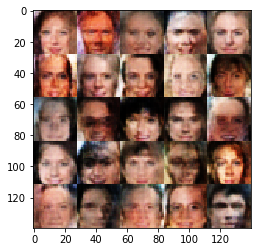

Epoch 1/1... Discriminator Loss: 0.7713... Generator Loss: 1.6336
Epoch 1/1... Discriminator Loss: 1.0151... Generator Loss: 1.7519
Epoch 1/1... Discriminator Loss: 0.9213... Generator Loss: 1.1338
Epoch 1/1... Discriminator Loss: 0.9001... Generator Loss: 1.3086
Epoch 1/1... Discriminator Loss: 1.0117... Generator Loss: 1.4492
Epoch 1/1... Discriminator Loss: 1.2420... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 0.9416... Generator Loss: 1.0129
Epoch 1/1... Discriminator Loss: 1.1727... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 0.9667... Generator Loss: 1.0578
Epoch 1/1... Discriminator Loss: 0.7984... Generator Loss: 1.5064


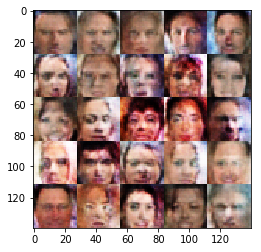

Epoch 1/1... Discriminator Loss: 0.9216... Generator Loss: 1.1782
Epoch 1/1... Discriminator Loss: 1.0629... Generator Loss: 0.9820
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 1.8259
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.0210... Generator Loss: 1.0667
Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 1.4216
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 1.6999
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 1.3632
Epoch 1/1... Discriminator Loss: 0.8695... Generator Loss: 1.7874
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 1.4339


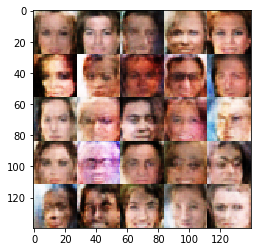

Epoch 1/1... Discriminator Loss: 0.9984... Generator Loss: 0.9100
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 1.0854
Epoch 1/1... Discriminator Loss: 0.9577... Generator Loss: 0.9254
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 0.6938
Epoch 1/1... Discriminator Loss: 0.9737... Generator Loss: 0.9104
Epoch 1/1... Discriminator Loss: 1.0666... Generator Loss: 0.8536
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.5063
Epoch 1/1... Discriminator Loss: 1.2848... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 1.0846... Generator Loss: 1.1853
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 1.6920


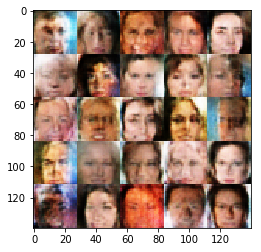

Epoch 1/1... Discriminator Loss: 1.0131... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 1.1902... Generator Loss: 1.5877
Epoch 1/1... Discriminator Loss: 1.0249... Generator Loss: 1.2880
Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 2.1168
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 1.7263
Epoch 1/1... Discriminator Loss: 0.9463... Generator Loss: 1.0382
Epoch 1/1... Discriminator Loss: 0.9391... Generator Loss: 3.2717
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 1.6285
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.2635
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.9810


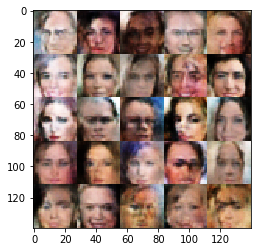

Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 1.0539
Epoch 1/1... Discriminator Loss: 0.8640... Generator Loss: 1.5456
Epoch 1/1... Discriminator Loss: 0.9604... Generator Loss: 1.0687
Epoch 1/1... Discriminator Loss: 0.9897... Generator Loss: 2.7044
Epoch 1/1... Discriminator Loss: 0.9061... Generator Loss: 1.2443
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 1.2473
Epoch 1/1... Discriminator Loss: 1.4455... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 1.0177... Generator Loss: 1.0332
Epoch 1/1... Discriminator Loss: 1.1296... Generator Loss: 1.0148
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 0.8949


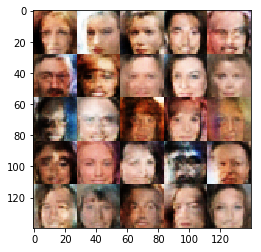

Epoch 1/1... Discriminator Loss: 0.8637... Generator Loss: 1.7213
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 3.0069
Epoch 1/1... Discriminator Loss: 0.8873... Generator Loss: 1.3084
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 1.0563
Epoch 1/1... Discriminator Loss: 0.8945... Generator Loss: 1.4597
Epoch 1/1... Discriminator Loss: 0.9377... Generator Loss: 1.1805
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 1.1013
Epoch 1/1... Discriminator Loss: 0.8003... Generator Loss: 1.5050
Epoch 1/1... Discriminator Loss: 0.9479... Generator Loss: 1.0746


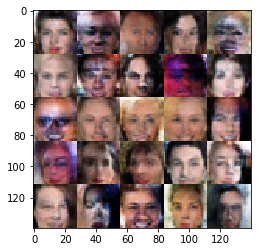

Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 1.2522
Epoch 1/1... Discriminator Loss: 0.9617... Generator Loss: 1.2274
Epoch 1/1... Discriminator Loss: 1.1163... Generator Loss: 0.7187
Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 0.9364
Epoch 1/1... Discriminator Loss: 0.8680... Generator Loss: 1.6968
Epoch 1/1... Discriminator Loss: 1.1524... Generator Loss: 0.7626
Epoch 1/1... Discriminator Loss: 0.8336... Generator Loss: 1.8502
Epoch 1/1... Discriminator Loss: 1.0021... Generator Loss: 1.9741
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 1.8720
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 0.6539


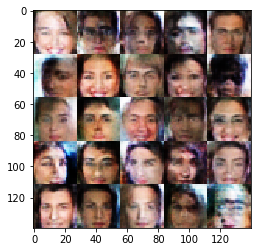

Epoch 1/1... Discriminator Loss: 1.6626... Generator Loss: 0.3859
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.5806
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 0.9325... Generator Loss: 1.1380
Epoch 1/1... Discriminator Loss: 1.0109... Generator Loss: 1.0296
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 1.0033
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.1095
Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 0.9502
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.5046
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 1.7131


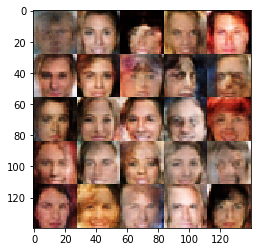

Epoch 1/1... Discriminator Loss: 0.8763... Generator Loss: 1.1569
Epoch 1/1... Discriminator Loss: 2.1346... Generator Loss: 3.0984
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.1732
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 1.0220
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.6514
Epoch 1/1... Discriminator Loss: 1.0250... Generator Loss: 0.9165
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 0.9619... Generator Loss: 1.1765
Epoch 1/1... Discriminator Loss: 1.2737... Generator Loss: 0.5728
Epoch 1/1... Discriminator Loss: 0.9856... Generator Loss: 1.0793


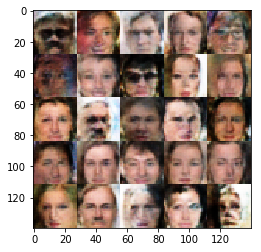

Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.1425
Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.1835
Epoch 1/1... Discriminator Loss: 0.8378... Generator Loss: 1.2106
Epoch 1/1... Discriminator Loss: 0.7886... Generator Loss: 1.7091
Epoch 1/1... Discriminator Loss: 1.1372... Generator Loss: 2.0984
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.6195
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 0.8932
Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 1.2713
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.9026


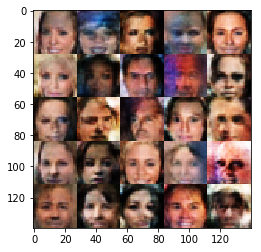

Epoch 1/1... Discriminator Loss: 0.9112... Generator Loss: 2.3199
Epoch 1/1... Discriminator Loss: 1.0600... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 0.8684... Generator Loss: 1.2371
Epoch 1/1... Discriminator Loss: 0.9351... Generator Loss: 1.1414
Epoch 1/1... Discriminator Loss: 0.8146... Generator Loss: 1.7215
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 1.7134
Epoch 1/1... Discriminator Loss: 0.9525... Generator Loss: 1.2536
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 0.6756
Epoch 1/1... Discriminator Loss: 1.0122... Generator Loss: 1.9487
Epoch 1/1... Discriminator Loss: 1.0531... Generator Loss: 2.2312


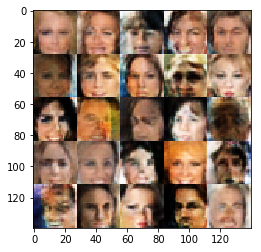

Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.2711... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.0334... Generator Loss: 1.9591
Epoch 1/1... Discriminator Loss: 0.8544... Generator Loss: 1.6701
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 1.1734
Epoch 1/1... Discriminator Loss: 0.9017... Generator Loss: 2.3392
Epoch 1/1... Discriminator Loss: 0.9883... Generator Loss: 1.7535
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 0.8694
Epoch 1/1... Discriminator Loss: 1.0252... Generator Loss: 1.1239
Epoch 1/1... Discriminator Loss: 0.8770... Generator Loss: 1.6379


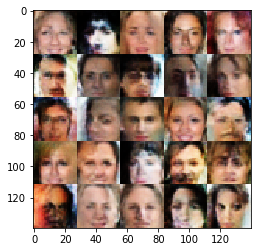

Epoch 1/1... Discriminator Loss: 0.9574... Generator Loss: 0.9284
Epoch 1/1... Discriminator Loss: 0.9873... Generator Loss: 1.5125
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.0331
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.7829
Epoch 1/1... Discriminator Loss: 1.0520... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.0055... Generator Loss: 1.0909
Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 1.3438
Epoch 1/1... Discriminator Loss: 0.9050... Generator Loss: 1.6805
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 1.8748
Epoch 1/1... Discriminator Loss: 1.1808... Generator Loss: 0.7109


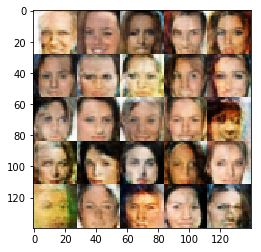

Epoch 1/1... Discriminator Loss: 1.7063... Generator Loss: 0.3502
Epoch 1/1... Discriminator Loss: 0.9153... Generator Loss: 1.7275
Epoch 1/1... Discriminator Loss: 0.9084... Generator Loss: 1.2141
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.7124
Epoch 1/1... Discriminator Loss: 0.8758... Generator Loss: 1.0871
Epoch 1/1... Discriminator Loss: 1.0009... Generator Loss: 2.9308


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.